In [48]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import time
port = "/dev/ttySC0"


In [49]:
scope= serial.Serial(port) 

In [64]:
scope.write(str.encode('MEASUrement:IMMed:TYPe PK2pk\n'))
measurments=[]



In [56]:
    
    scope.write(str.encode('ACQuire:STOPAfter SEQUENCE\n'))
    scope.write(str.encode('ACQuire:STATE ON\n'))

    scope.write(str.encode('*OPC?\n'))
    
    scope.readline().decode('utf-8')
    
    scope.write(str.encode('MEASUrement:IMMed:VALue?\n'))
    measurment= scope.readline().decode('utf-8')
    print(measurment)

:MEASUREMENT:IMMED:VALUE 7.4133E-1



In [57]:
endTime=datetime.datetime.now()+datetime.timedelta(minutes=60*56)

while( datetime.datetime.now()<= endTime):
    scope.write(str.encode('ACQuire:STOPAfter SEQUENCE\n'))
    scope.write(str.encode('ACQuire:STATE ON\n'))

    scope.write(str.encode('*OPC?\n'))
    scope.readline().decode('utf-8')
    scope.write(str.encode('MEASUrement:IMMed:VALue?\n'))
    measurment= float(scope.readline().decode('utf-8')[25:-1])
    measurments.append(measurment)
    

KeyboardInterrupt: 

First 682 measerments made at 100mV Scale, triggering at -20 mv up slope

In [58]:
len(measurments)

81369

Text(0.5, 0, 'Peak to Peak (V)')

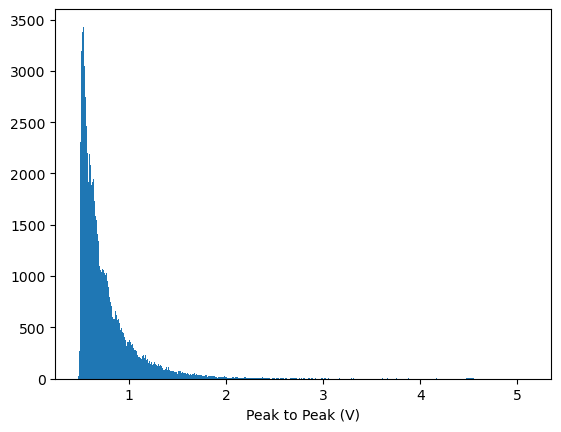

In [62]:
plt.hist(measurments,bins=500)
plt.xlabel("Peak to Peak (V)")

In [63]:
## write csv
filename= "P2P_trashy_250mvtrg_"+datetime.datetime.now().isoformat(sep="_")+".csv"
f=open(filename,"a")
for i in measurments:
    f.write(str(i)+"\n")
f.close()

In [2]:
filename="Scope_2023-08-25_14:27:38.263299.csv"

In [3]:
df=pd.read_csv(filename,header=None)

In [4]:
df.loc[1][1]

318

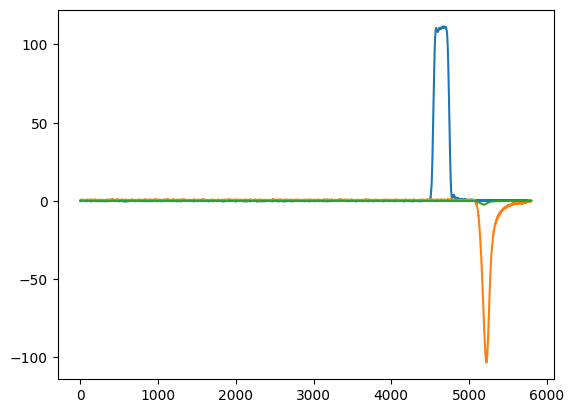

In [9]:
start=0
end=5800
plt.plot((df.loc[0][start:end]-df.loc[0][0])/200)
#plt.plot(df.loc[1][start:end]-df.loc[1][0])
plt.plot((df.loc[2][start:end]-df.loc[2][0])/126.622)
plt.plot((df.loc[3][start:end]-df.loc[3][0])/3481.28)

In [94]:
dynode=np.min((df.loc[2][start:end]-df.loc[2][0])/32.5)

In [95]:
anode=np.min((df.loc[3][start:end]-df.loc[3][0])/686.315)

In [96]:
dynode/anode

32.60538136639199

In [89]:
np.min(df.loc[2][start:end]-df.loc[2][0])

-13087

In [90]:
np.min(df.loc[3][start:end]-df.loc[3][0])

-8476